In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt

In [2]:
start = dt.datetime(2021,6,1)
end = dt.datetime(2022,1,28)
# stk_data = gh(symbol = 'TATACOFFEE', start=start, end=end)
stk_data = pd.read_csv("Tatacoffee13_21.csv", index_col='Date')

In [3]:
# stk_data = stk_data[["Open","High","Low","Close"]]
stk_data

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [4]:
column = "Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1=Ms.fit_transform(stk_data[[column]])
print("len:",data1.shape)

len: (2225, 1)


In [6]:
training_size = round(len(data1)*0.95)
print("training_size-",training_size)
x_train = data1[:training_size]
x_test = data1[training_size:]
print("x_train-",x_train.shape)
print("x_test-",x_test.shape)
y_train = data1[:training_size]
y_test = data1[training_size:]
print("y_train-",y_train.shape)
print("y_test-",y_test.shape)

training_size- 2114
x_train- (2114, 1)
x_test- (111, 1)
y_train- (2114, 1)
y_test- (111, 1)


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
trends = ['n','t','c','ct']
orders = [(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA

for td in trends:
    #print(td)
    model = ARIMA(x_train,order=(0,0,10),trend=td)
    model_fit = model.fit()
    y_pred = model_fit.predict(len(x_train),len(data1)-1)
    
    from sklearn.metrics import r2_score
    mse = mean_squared_error(y_test, y_pred)
    #print(y_pred)

    print("Trend={}".format(td))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE:", rmse)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE:", mape)
    print("***********")

Trend=n
RMSE: 0.09849683735784596
MAPE: 0.9637503276246903
***********
Trend=t
RMSE: 0.008637144286805096
MAPE: 0.07566379615377375
***********
Trend=c
RMSE: 0.08309227909055145
MAPE: 0.8157999275488552
***********
Trend=ct
RMSE: 0.28318231487890116
MAPE: 2.8201519022512485
***********


C:\Users\Pragadeesh K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
len(y_pred)

111

In [10]:
order=(0,0,10)
td='t'
model = ARIMA(x_train,order=(0,0,10),trend=td)
model_fit = model.fit()
y_pred = model_fit.predict(len(x_train),len(data1)-1)
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test,y_pred)
print("Trend={}".format(td))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)

Trend=t
RMSE: 0.008637144286805096
MAPE: 0.07566379615377375


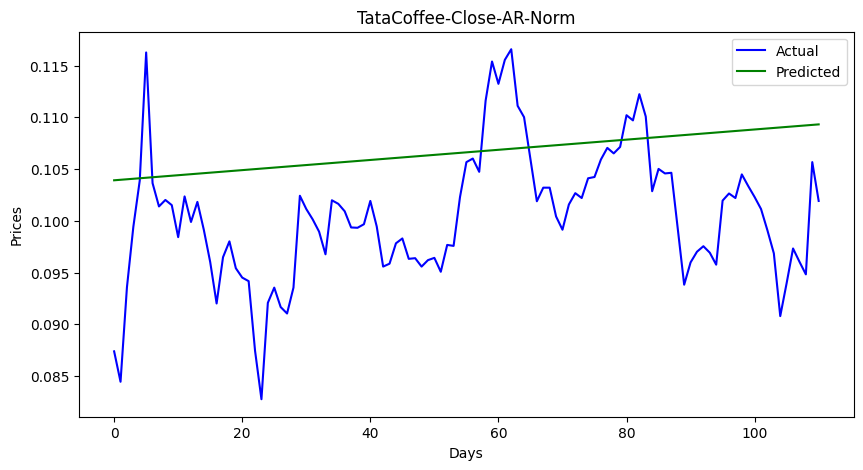

In [11]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [12]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori = Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = conversionSingle(actual_stock_price_test_ori,[column])

In [13]:
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori = Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriA = conversionSingle(predicted_stock_price_test_ori,[column])

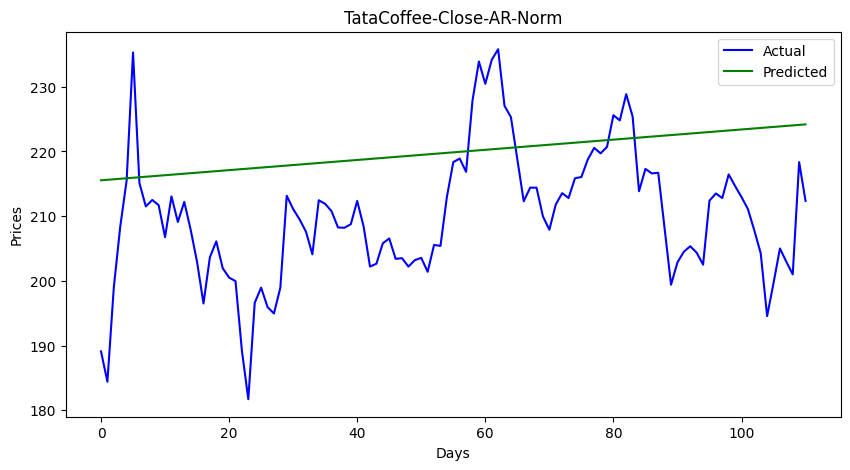

In [14]:
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriA,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [16]:
forecast = model_fit.predict(len(data1),len(data1)+3)
forecast

array([0.10936932, 0.10941845, 0.10946758, 0.10951671])

In [17]:
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori = Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriA = conversionSingle(forecast_stock_price_test_ori,["Closefore"])
forecast_stock_price_test_oriA

,Closefore
0,224.259662
1,224.338216
2,224.416769
3,224.495322


In [18]:
forecast_stock_price_test_oriA.to_csv("CloseMA.csv",index=False)